In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from TestProblems import prey_predator_model, van_der_pol_model, PreyPredator_f

ImportError: cannot import name 'PreyPredator_f' from 'TestProblems' (/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py)

# Test simulations for the test problems

## Prey-predator model

In [13]:
# Define time span and initial conditions
t_span = (0, 50)
x0 = [40, 9]  # Example initial conditions for prey and predator populations

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(PreyPredator_f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 10))

# Solve using ode15s (method='LSODA')
solution_ode15s = solve_ivp(PreyPredator_f, t_span, x0, method='LSODA', t_eval=np.linspace(t_span[0], t_span[1], 10))

NameError: name 'PreyPredator_f' is not defined

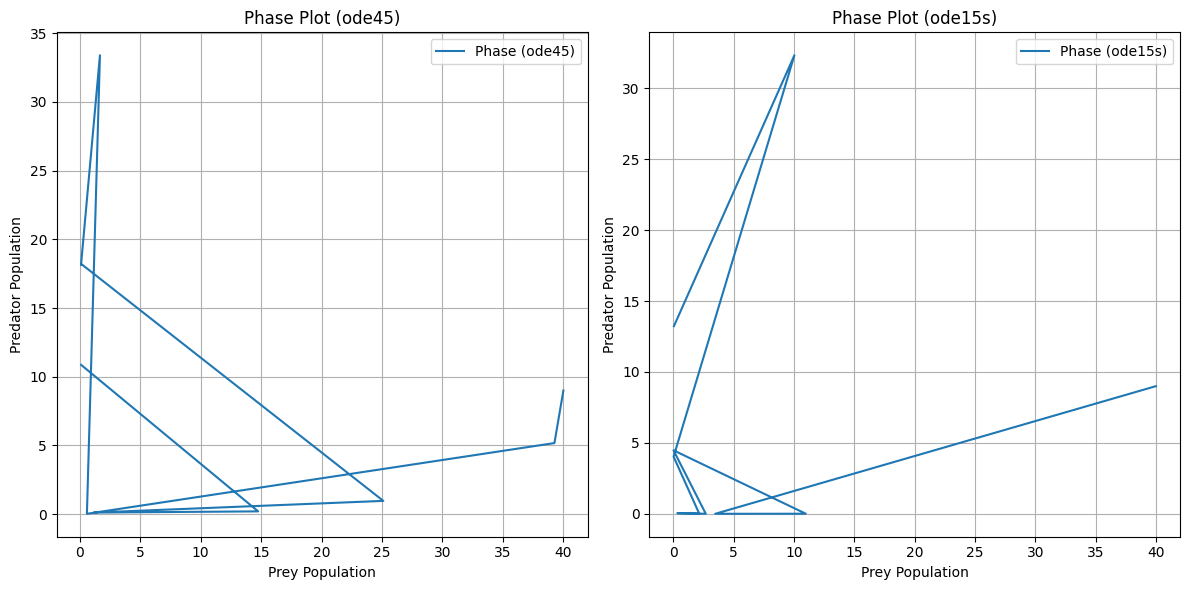

In [14]:
plt.figure(figsize=(12, 6))

# Phase plot for ode45
plt.subplot(1, 2, 1)
plt.plot(solution_ode45.y[0], solution_ode45.y[1], label='Phase (ode45)')
plt.title('Phase Plot (ode45)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

# Phase plot for ode15s
plt.subplot(1, 2, 2)
plt.plot(solution_ode15s.y[0], solution_ode15s.y[1], label='Phase (ode15s)')
plt.title('Phase Plot (ode15s)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
